# 🍴 TastyBytes: Data Exploration and Analysis

Welcome to **TastyBytes**, a professional data analysis notebook designed to explore, analyze, and visualize food-related datasets.  

This notebook demonstrates clean data handling, insightful analytics, and visually appealing results — all formatted for clarity and readability on GitHub.

---

# # 📘 Table of Contents
1. [Introduction](# introduction)
2. [Importing Libraries](# importing-libraries)
3. [Loading the Dataset](# loading-the-dataset)
4. [Data Exploration](# data-exploration)
5. [Data Cleaning](# data-cleaning)
6. [Visualization](# visualization)
7. [Insights & Conclusion](# insights--conclusion)

---

In [8]:
# Start coding here...
import pandas as pd
import numpy as np

df = pd.read_csv('recipe_site_traffic_2212.csv')

df_info = df.info()
df_description = df.describe(include='all')

print(df_info)
print(df_description)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB
None
            recipe     calories  carbohydrate  ...   category  servings high_traffic
count   947.000000   895.000000    895.000000  ...        947       947          574
unique         NaN          NaN           NaN  ...         11         6            1
top            NaN          NaN           NaN  ...  Breakfast         4         High
freq           NaN          NaN           NaN  ...        

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [9]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

df = pd.read_csv('recipe_site_traffic_2212.csv')
df_clean = df.copy()

df_clean['servings'] = pd.to_numeric(df_clean['servings'], errors='coerce')
for col in ['calories', 'carbohydrate', 'sugar', 'protein', 'servings']:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

df_clean['target'] = df_clean['high_traffic'].apply(lambda x: 1 if x == 'High' else 0)

features = ['calories', 'carbohydrate', 'sugar', 'protein', 'servings']
X = df_clean[features]
y = df_clean['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_logreg))

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.56      0.05      0.10        93
           1       0.61      0.97      0.75       144

    accuracy                           0.61       237
   macro avg       0.58      0.51      0.43       237
weighted avg       0.59      0.61      0.50       237

Random Forest Report:
              precision    recall  f1-score   support

           0       0.52      0.34      0.42        93
           1       0.65      0.80      0.72       144

    accuracy                           0.62       237
   macro avg       0.59      0.57      0.57       237
weighted avg       0.60      0.62      0.60       237



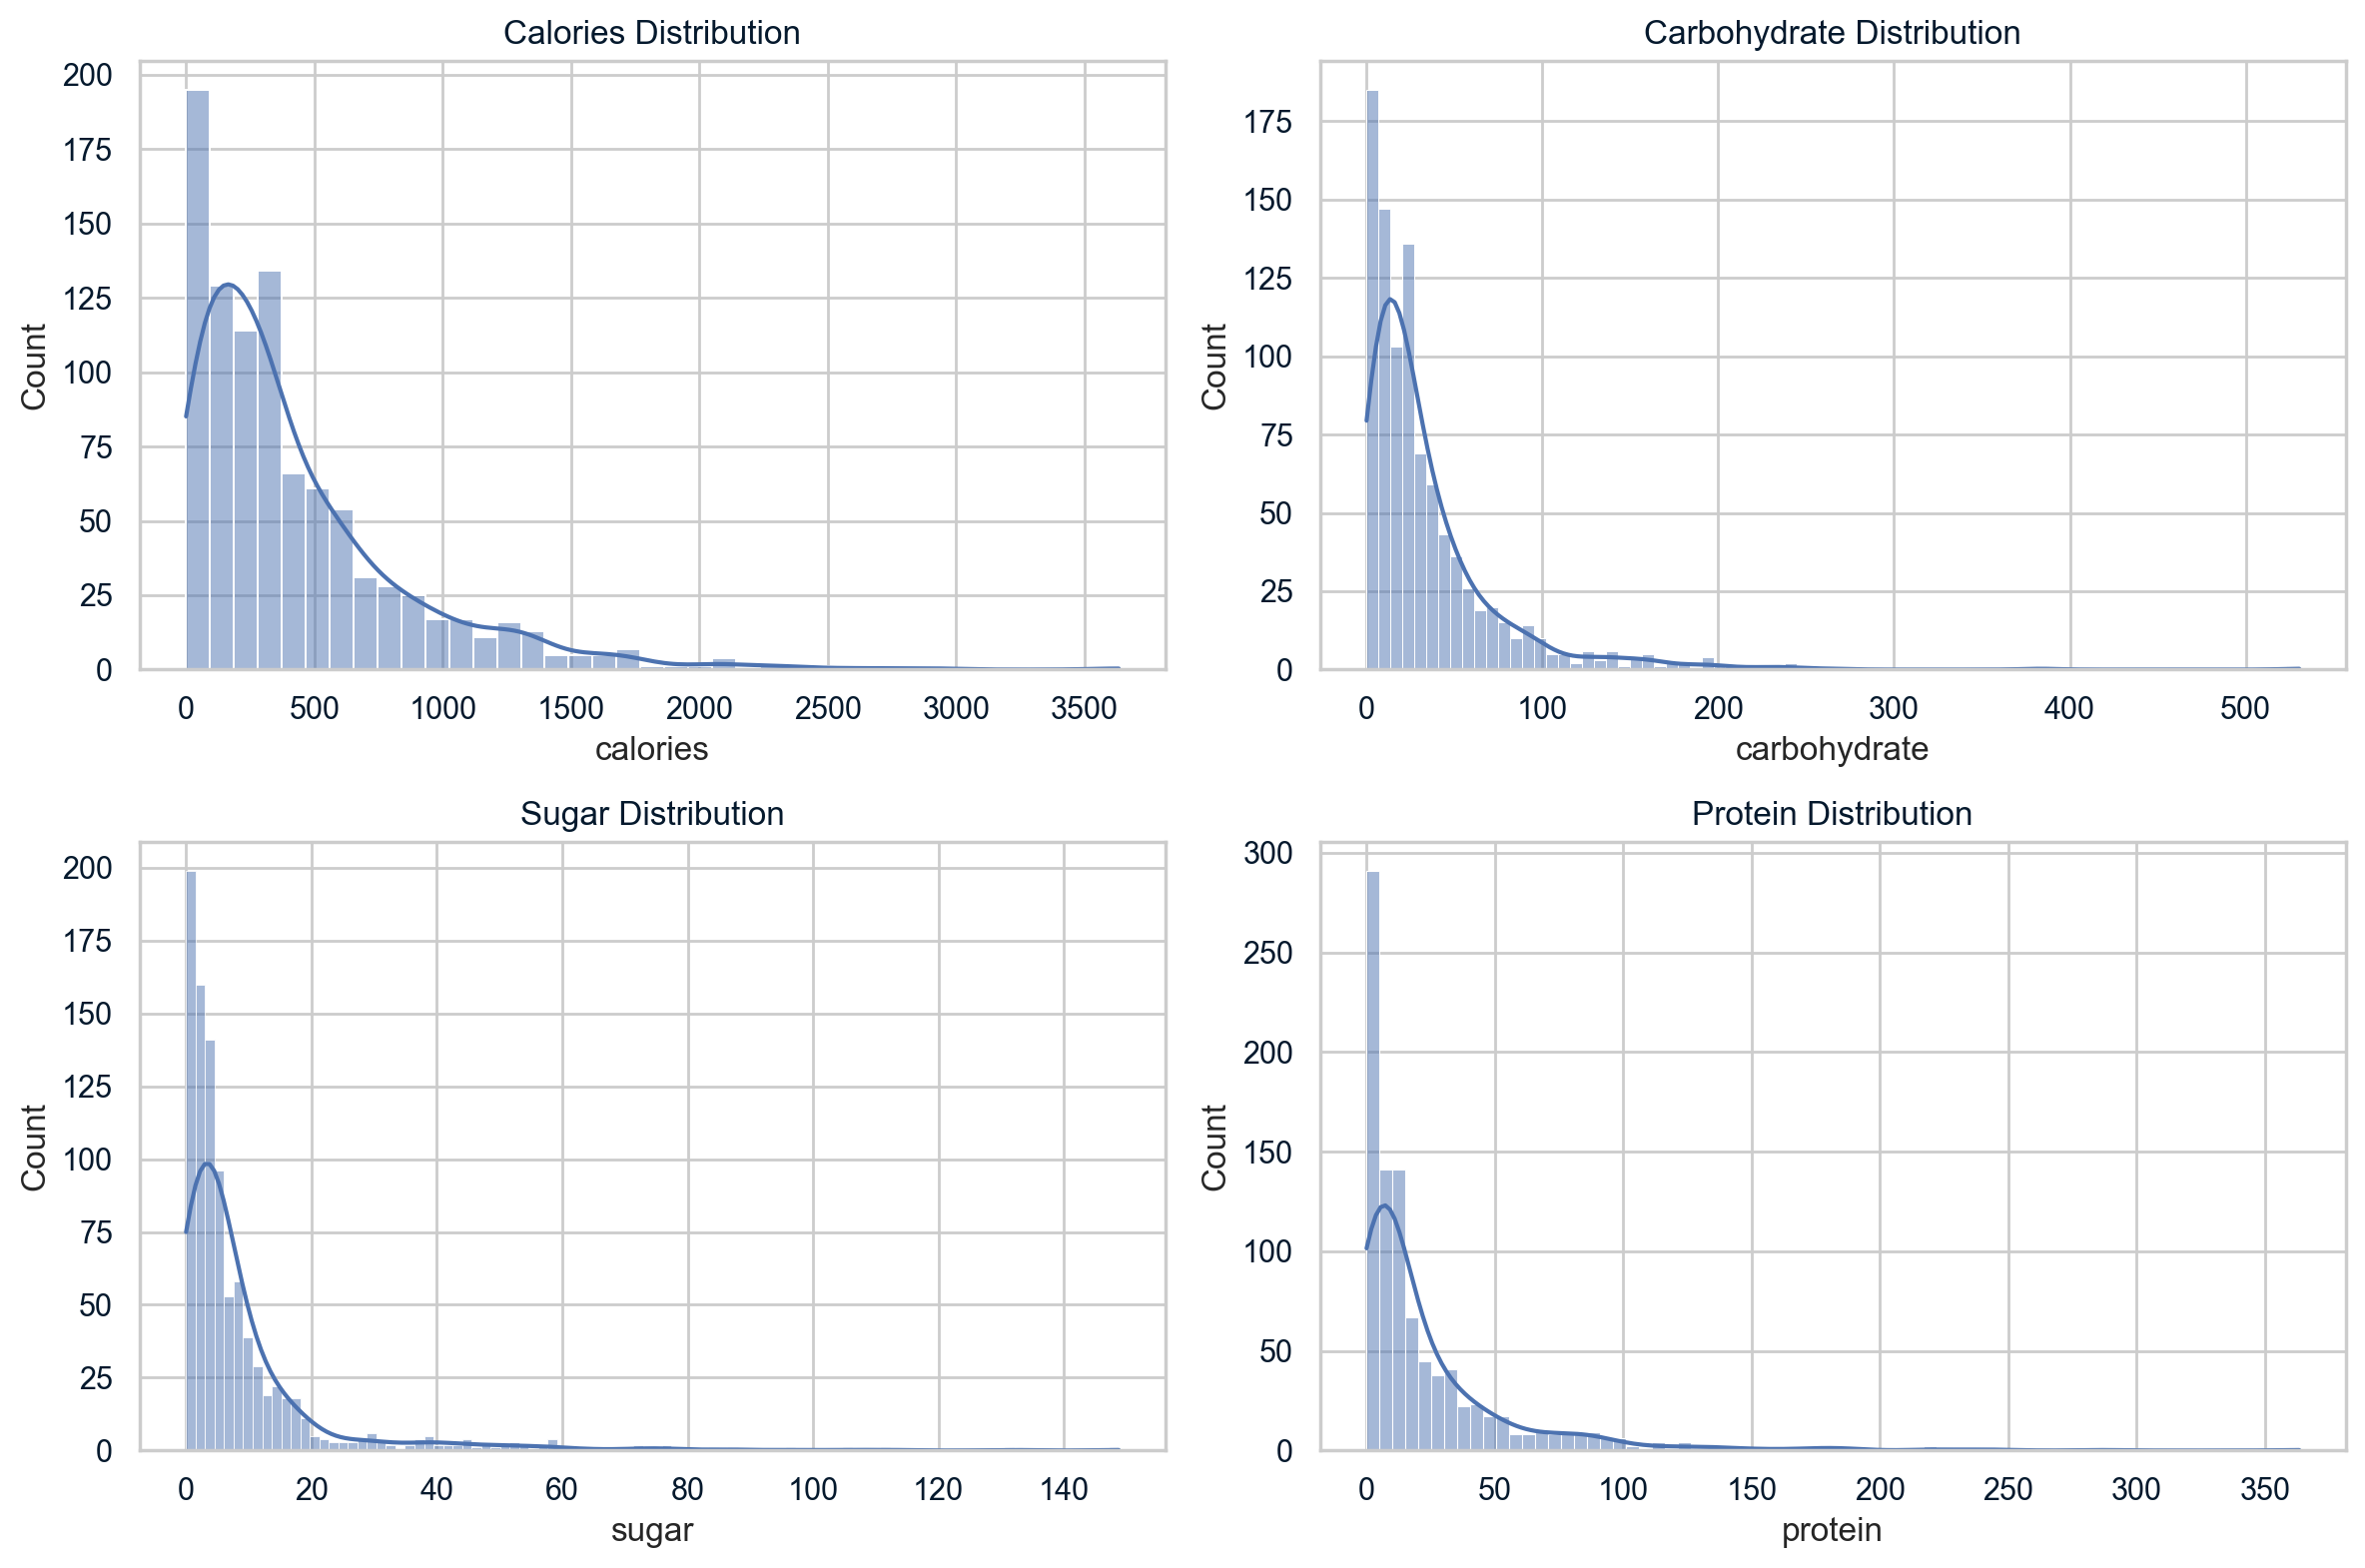

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(df_clean['calories'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Calories Distribution')

sns.histplot(df_clean['carbohydrate'], kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Carbohydrate Distribution')

sns.histplot(df_clean['sugar'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Sugar Distribution')

sns.histplot(df_clean['protein'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Protein Distribution')

plt.tight_layout()
plt.show()

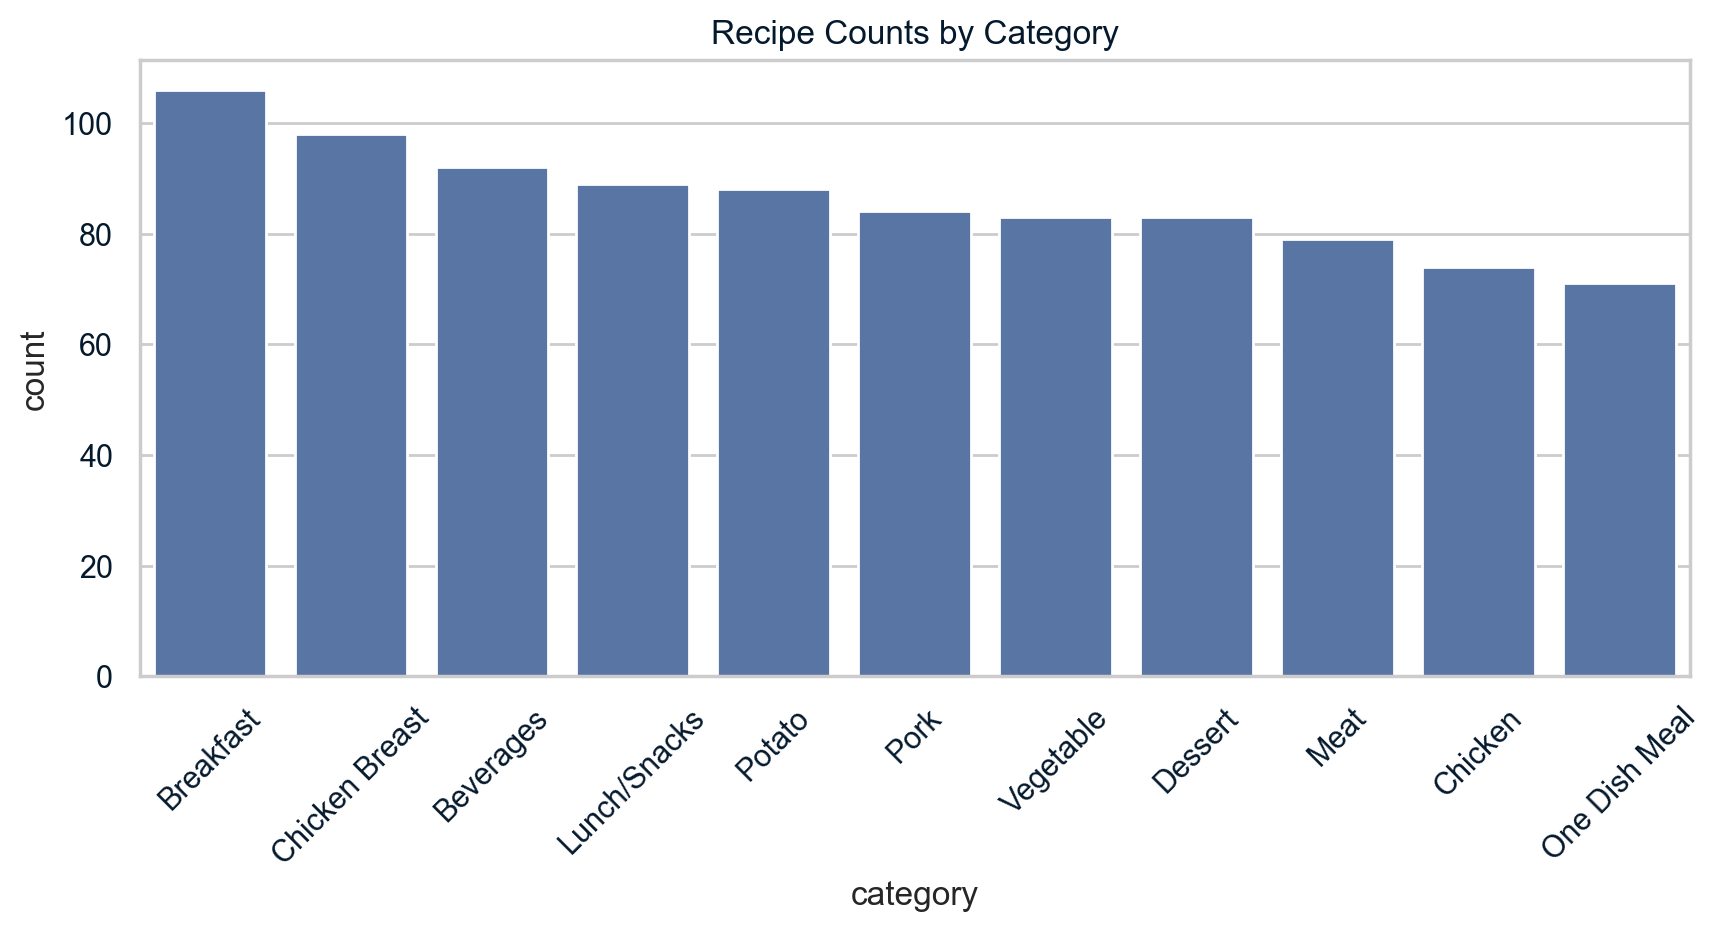

In [11]:
plt.figure(figsize=(10, 4))
sns.countplot(x='category', data=df_clean, order=df_clean['category'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Recipe Counts by Category")
plt.show()

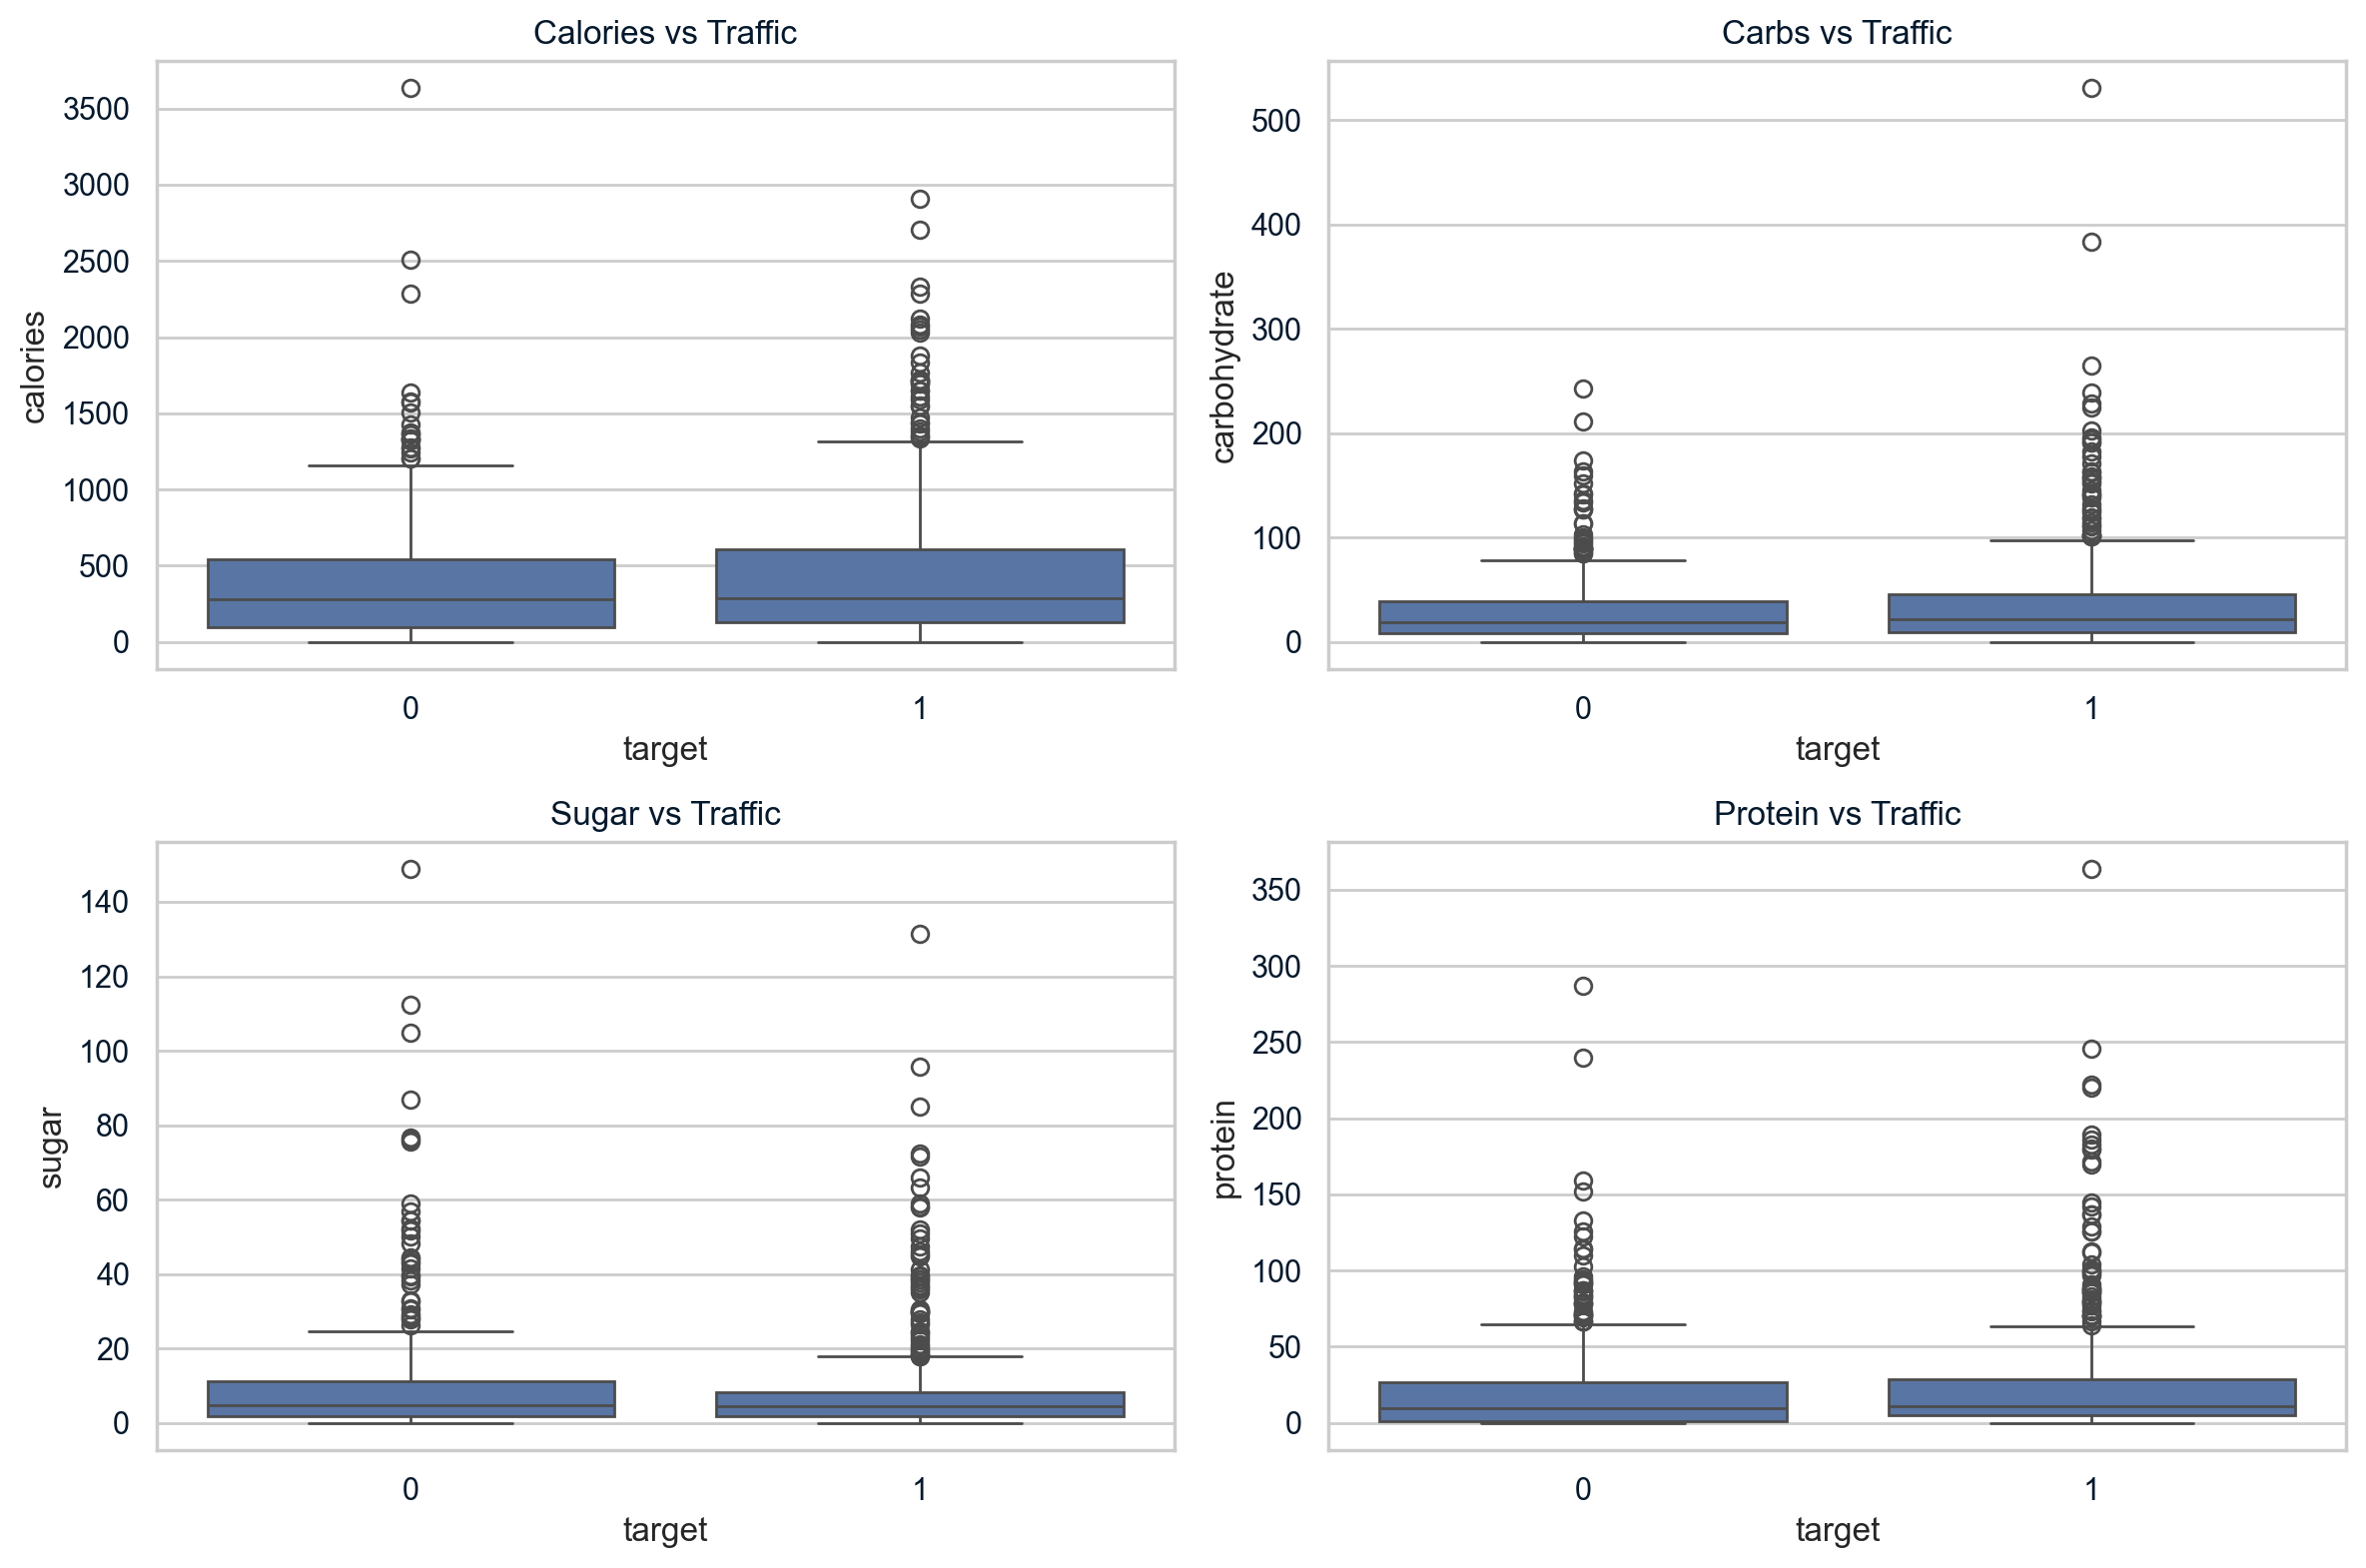

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x='target', y='calories', data=df_clean, ax=axs[0, 0])
sns.boxplot(x='target', y='carbohydrate', data=df_clean, ax=axs[0, 1])
sns.boxplot(x='target', y='sugar', data=df_clean, ax=axs[1, 0])
sns.boxplot(x='target', y='protein', data=df_clean, ax=axs[1, 1])

axs[0, 0].set_title('Calories vs Traffic')
axs[0, 1].set_title('Carbs vs Traffic')
axs[1, 0].set_title('Sugar vs Traffic')
axs[1, 1].set_title('Protein vs Traffic')

plt.tight_layout()
plt.show()


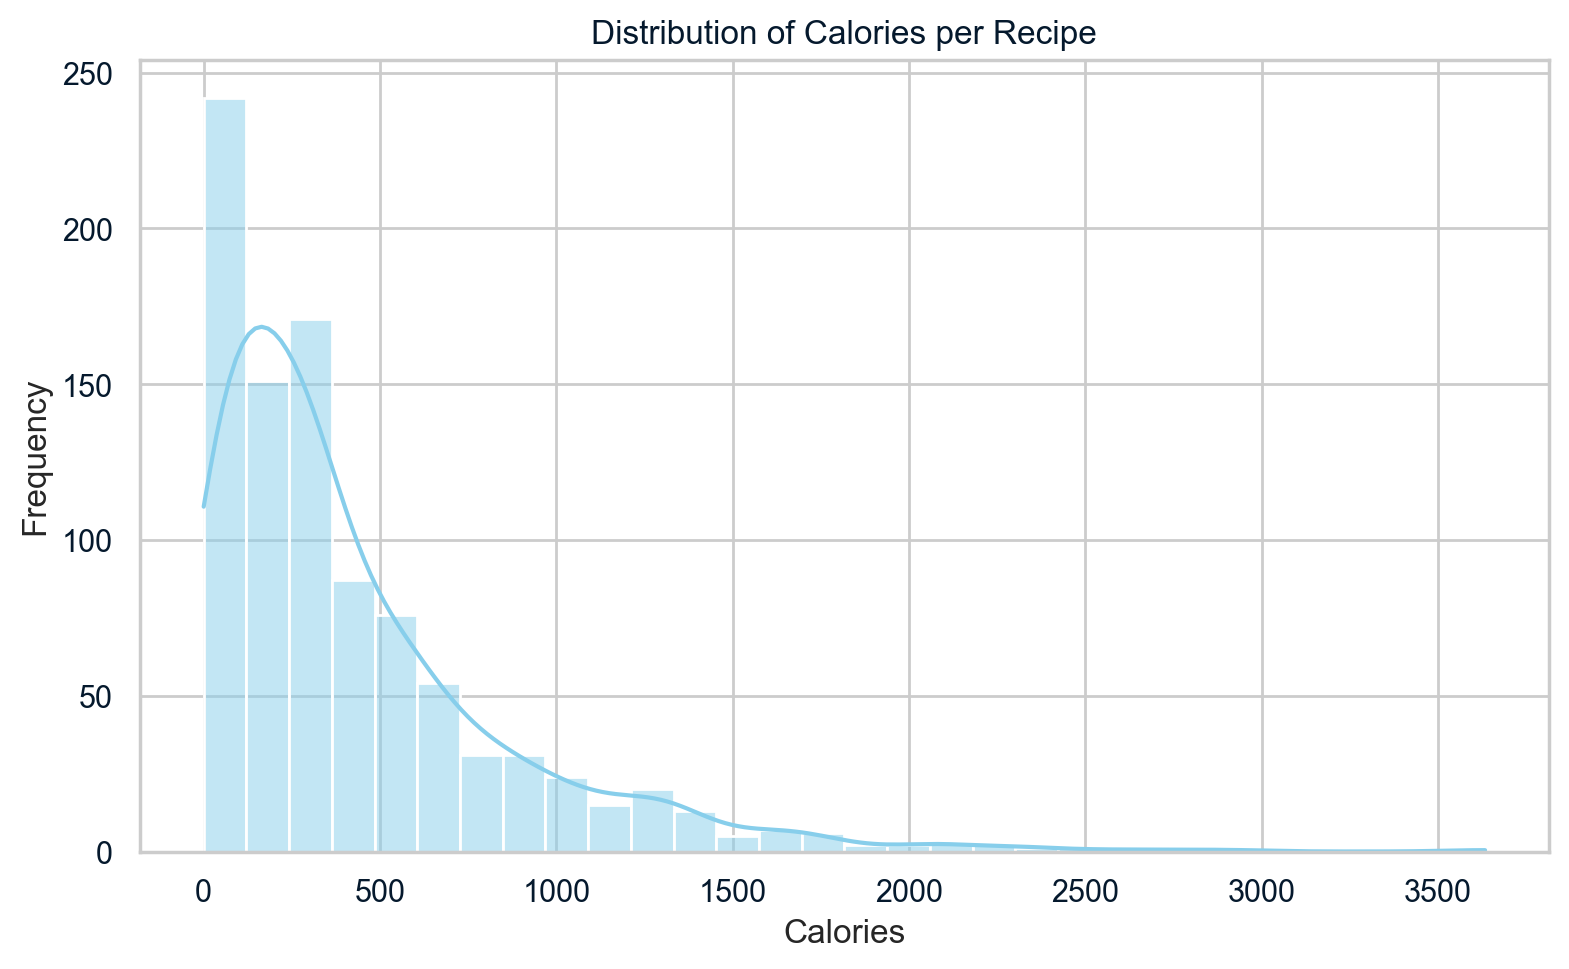

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.histplot(df_clean['calories'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Calories per Recipe')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [14]:
from sklearn.metrics import recall_score

recall_high = recall_score(y_test, y_pred_rf)
print("Recall for High Traffic Recipes (Random Forest):", recall_high)


Recall for High Traffic Recipes (Random Forest): 0.7986111111111112


---
## 🎯 Final Thoughts

This notebook demonstrates the power of **data storytelling** — blending data exploration, visualization, and insight extraction in a clean, reproducible format.

> _Created with ❤️ for the data community._

---
